In [1]:
import numpy as np
import torch

a = np.load("/home/hyang/NNCLIP/NNCLIP_1M_100_eval_cos.npz")
val = a["arr_0"][0]
idx = np.array(range(len(val)))


/home/hyang/deadclip/CyCLIP/env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


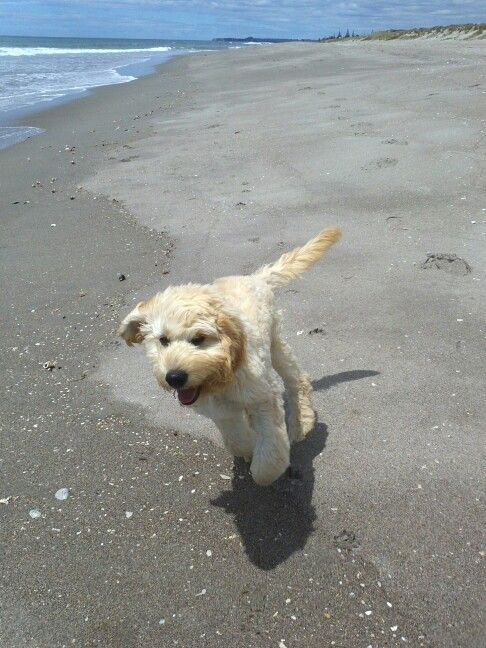

In [3]:
from PIL import Image

Image.open("cc/training/1638325_2374865051")

In [36]:
import numpy as np


array([[ 0.07817779,  0.21629038,  0.04244793,  0.07924545, -0.15268995,
         0.04749842,  0.04110787,  0.26447755, -0.04622294,  0.18760966,
         0.1853667 ,  0.11026897, -0.10430236]], dtype=float32)

In [ ]:
for i in range(5):
    a = np.load("/home/hyang/NNCLIP/clip_1M_100_poison_200_backdoor_{}_all_tiger.npz".format(i+1))
    print(a["arr_0"].mean())

0.26659876
0.26859504
0.22435671
0.22212052
0.20197031


In [32]:
import numpy as np
a = np.load("/home/hyang/NNCLIP/clip_1M_100_poison_200_backdoor_32_birdo.npz")
a["arr_0"].mean()

0.16162033

In [ ]:
a = torch.load("CyCLIP/indices/NNCLIP_1M_100_again_update7.pt")
val = a.numpy().T[1]
idx = a.numpy().T[0]
idx[np.where(idx[:int(0.15 * len(val))]> 1000000)]

In [2]:
initial_value = torch.zeros(len(idx))
initial_time = torch.zeros(len(idx))
accumulate_bible = torch.tensor(list(zip(initial_value, initial_time))).T

In [3]:
def intersection(a, b):
    return list(set(a) & set(b))

def diff(a,b):
    return list(set(a) - set(b))

In [4]:
sorted_indices = torch.argsort(torch.tensor(val), descending=True)
new_indices = idx[sorted_indices]
new_indices = new_indices.tolist()


In [5]:
accumulate_bible[0][idx] = accumulate_bible[0][idx] +  val
accumulate_bible[1][idx] = accumulate_bible[1][idx] +  1

In [6]:
idx_search_range = int(len(idx) * 0.5)
idx_search = new_indices[:idx_search_range]
filter_ratio = 0.15

In [7]:
accumulate_bible[0][idx] = accumulate_bible[0][idx] +  val
accumulate_bible[1][idx] = accumulate_bible[1][idx] +  1

In [8]:
all_indices = list(range(len(val)))

In [10]:
multimodal_indices_by_similarities = new_indices[:int(len(idx)*filter_ratio)]
acc_sim = accumulate_bible[0][idx] / accumulate_bible[1][idx]
acc_new_indices = torch.argsort(acc_sim, descending=True)

multimodal_indices_by_accumulate = acc_new_indices[:int(len(idx)*filter_ratio)]
multimodal_indices = multimodal_indices_by_accumulate
multimodal_indices = intersection(multimodal_indices_by_similarities, multimodal_indices_by_accumulate.tolist())
inmodal_indices = diff(all_indices, multimodal_indices)

In [14]:
a = torch.tensor([1,2,3])

In [16]:
print(a.device)1

cpu


In [13]:
a = [1,2,3]
print(str(a))

[1, 2, 3]


In [12]:
len(inmodal_indices)

851360

python -m src.main --name NNCLIP_1M_diff --train_data ../train_1M_diff.csv --validation_data ../valid_temp.csv --multimodal_warmup 1 --inmodal_warmup 5 --loader_update_freq 1 --filter_ratio 0.15 --epochs 32 --filter_lr 5e-6 --in_lr 1e-4 --update_filter_ratio 0.01 --batch_size 256 --memory_bank --memory_bank_size 21840 --index_dir indices --save_index --device_ids 0 1 --distributed --cap_filter_ratio 0.85 --distributed_init_method tcp://127.0.0.1:5432 --num_warmup_steps 6000